In [5]:
# !pip install tensorflow

import tensorflow as tf
import sys

print("파이썬 버전 : ", sys.version)
print("tensorflow 버전: ", tf.__version__)

파이썬 버전 :  3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
tensorflow 버전:  2.16.1


In [6]:
import numpy as np

np.random.seed(7)

# 데이터 로딩, 시작36행은 건너뜀
data = np.genfromtxt("c:/data/regression/x09.txt", skip_header=36)

data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

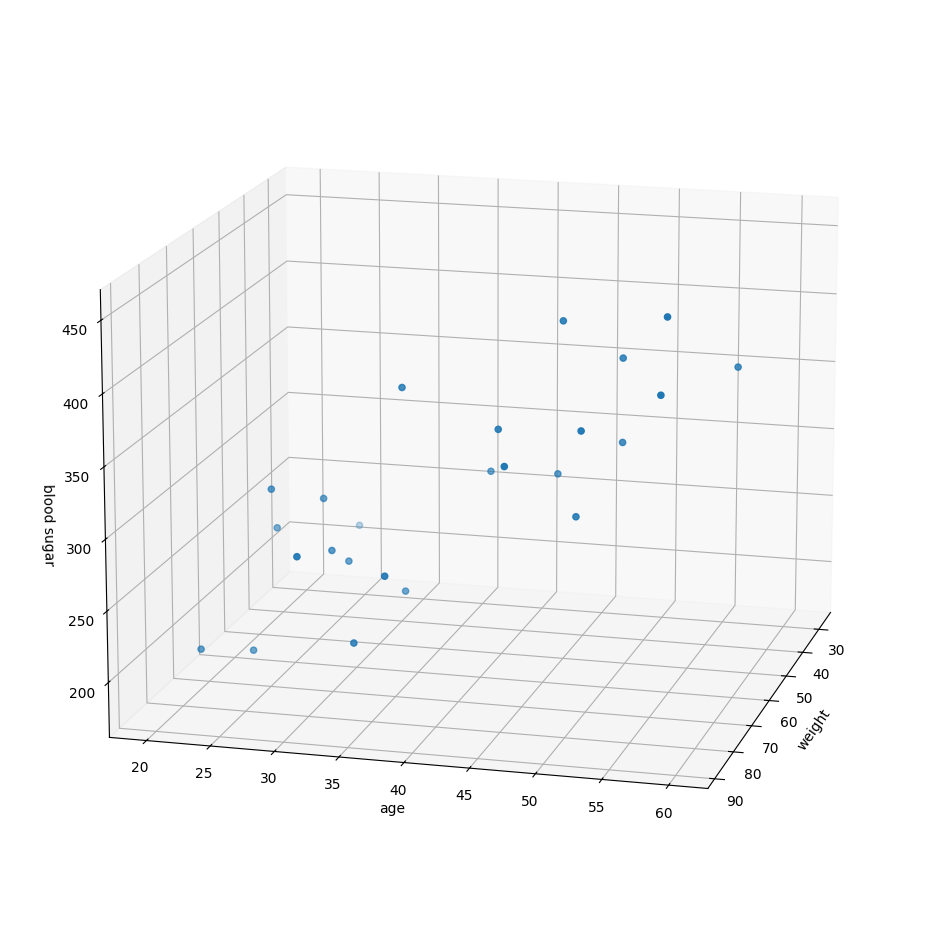

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xdata = np.array(data[:, 2], dtype=np.float32)
#                행범위,열범위
#          : → 모든범위, 2열   
ydata = np.array(data[:, 3], dtype=np.float32)
zdata = np.array(data[:, 4], dtype=np.float32)

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection="3d")
#               1행 1열 1번			3차원
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15, 15)  # 출력 각도 설정

plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

# 데이터를 케라스에 맞게 변환

# 독립변수
x_data = np.array(data[:, 2:4], dtype=np.float32)

# 종속변수
y_data = np.array(data[:, 4], dtype=np.float32)

In [9]:
# 회귀분석 모델 생성
model = Sequential()  # 신경망모형
model.add(Dense(1, input_shape=(2,)))
# layer 추가 → Dense 밀집행렬 : Dense(output, input)

# 손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
# 신경망 학습의 목표 : 손실함수의 결과값을 가장 작게 만드는 것 → 손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 신경망 모형의 학습 과정

# 최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수
# https://keras.io/ko/optimizers/  옵티마이저 참조

# 평균제곱오차(Meam Squared Error, MSE) : 회귀분석에서 많이 사용하는 손실함수

rmsprop = RMSprop(learning_rate=0.01)  # 학습률 0.01

model.compile(loss="mse", optimizer=rmsprop)
#          손실함수=평균제곱오차,  오차교정

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

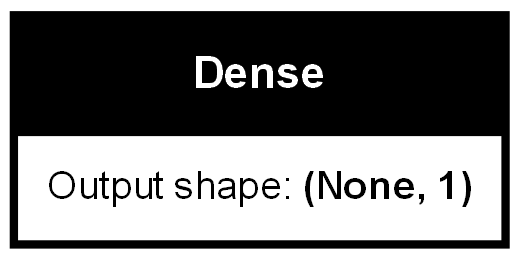

In [10]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [11]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 72656.5312
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70839.1953
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 69544.3281
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 68474.0000
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 67534.0156
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 66680.7344
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 65889.9062
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 65146.4336
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64440.2461
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63764.2305
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63113.1641
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 62483.1094
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 61870.9805
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 61274.3555
Epoch 15/1000


In [12]:
hist.history.keys()

dict_keys(['loss'])

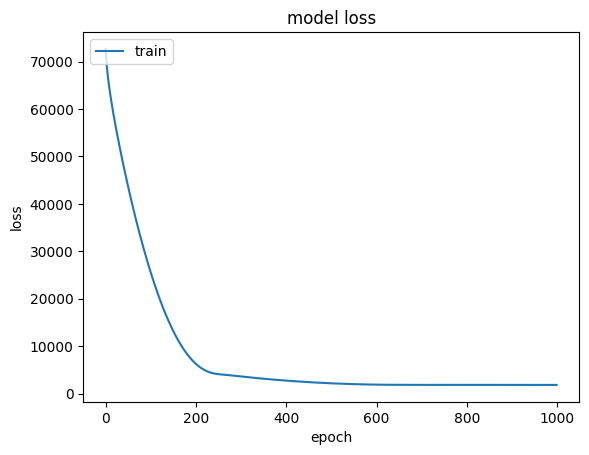

In [13]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")

plt.show()

In [14]:
# 새로운 데이터로 예측

# 체중 100kg, 40세
# 1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100, 40]).reshape(1, 2))
#                       1차원             1행2열

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[351.90454]], dtype=float32)

In [15]:
# 체중 60kg, 25세
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[220.46613]], dtype=float32)

In [16]:
# 회귀선을 그리기 위한 작업
# 가중치와 절편(bias:편향)
w, b = model.get_weights()
w, b

(array([[1.2034785],
        [5.553285 ]], dtype=float32),
 array([9.425294], dtype=float32))

In [17]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x = np.linspace(20, 100, 50).reshape(50, 1)
#                  20~100 → 50등분
y = np.linspace(10, 70, 50).reshape(50, 1)

x2 = np.concatenate((x, y), axis=1)  # x,y연결

# 행렬곱셈(matrix multiply)
z = np.matmul(x2, w) + b

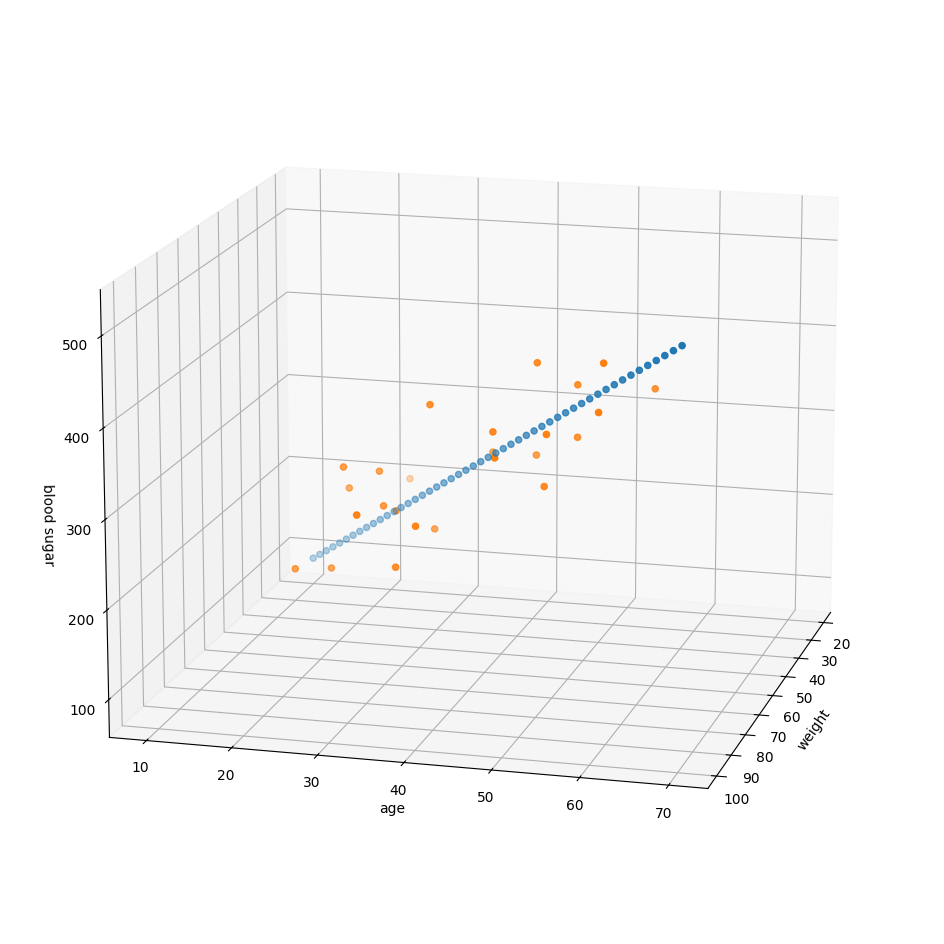

In [18]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection="3d")

# 회귀선
ax.scatter(x, y, z)

# 산점도
ax.scatter(xdata, ydata, zdata)

ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15, 15)

plt.show()